In [1]:
import pandas as pd



In [6]:
# Load the CSV file to check its contents
file_path = 'classification_results_3_fbcsp.csv'
classification_data = pd.read_csv(file_path)

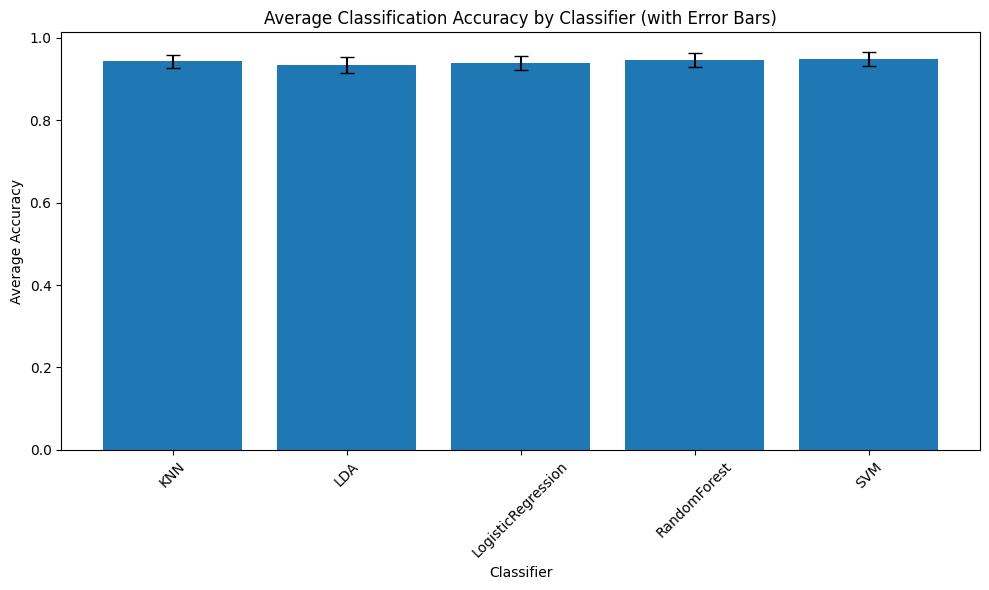

In [7]:
import matplotlib.pyplot as plt

# Group by classifier and calculate the mean and standard deviation
classifier_summary = classification_data.groupby('classifier').agg(
    mean_accuracy=('mean_accuracy', 'mean'),
    std_accuracy=('std_accuracy', 'mean')
).reset_index()

# Create the plot
plt.figure(figsize=(10,6))
plt.bar(classifier_summary['classifier'], classifier_summary['mean_accuracy'], 
        yerr=classifier_summary['std_accuracy'], capsize=5)

# Customize the plot
plt.xlabel('Classifier')
plt.ylabel('Average Accuracy')
plt.title('Average Classification Accuracy by Classifier (with Error Bars)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
